# GLUE Sample QC

## Setup

In [2]:
library(tidyverse, quietly = TRUE)

In [116]:
# Load in sample sheet for all GLUE samples
sample_sheet <- suppressMessages(read_delim('../resources/glue_allSamples_sampleSheet.txt', delim = '\t')) %>%
    rename('Sample' = 'sample')

# Load in post-mapping stats from Qualimap
# Split Sample names into city, pop, and individuals
qualimap_stats <- suppressMessages(read_delim('../../results/qc/multiqc/multiqc_data/multiqc_qualimap_bamqc_genome_results_qualimap_bamqc.txt', delim = '\t')) %>%
    mutate(Sample = str_extract(Sample, pattern = '(?<=\\|\\s)\\w+(?=$)')) %>%
    mutate(Sample = case_when(str_detect(Sample, 'Loja_40_NA') ~ 'Loja_40_NA', TRUE ~ Sample))  # Fix for single sample in Loja resulting from RegEx matching issue in multiqc

# All data
allData <- left_join(qualimap_stats, sample_sheet, by = 'Sample') %>%
    # Change Toronto site levels so they match other cities
    mutate(site = case_when(site == 'Rural' ~ 'r',
                            site == 'Urban' ~ 'u',
                            site == 'Suburban' ~ 's',
                            TRUE ~ site))
head(allData)

Sample,bam_file,total_reads,mapped_reads,mapped_bases,sequenced_bases,mean_insert_size,median_insert_size,mean_mapping_quality,general_error_rate,mean_coverage,percentage_aligned,continent,city,pop,individual,site,range,library,lane
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Albuquerque_14_10,/home/santang3/scratch/glue/results/bam/final/Albuquerque_14_10_merged_sorted_dupsMarked.bam,7527708,7371352,822927631,821644752,28075.04,111,11.1493,0.0190,0.8947,97.92293,NAM,Albuquerque,14,10,u,Introduced,deep3,1
Albuquerque_14_14,/home/santang3/scratch/glue/results/bam/final/Albuquerque_14_14_merged_sorted_dupsMarked.bam,6817133,6655410,838947918,837331915,50319.86,137,12.5761,0.0192,0.9121,97.62770,NAM,Albuquerque,14,14,u,Introduced,deep3,1
Albuquerque_14_17,/home/santang3/scratch/glue/results/bam/final/Albuquerque_14_17_merged_sorted_dupsMarked.bam,4608071,4553696,623773085,622289978,102258.42,159,13.0849,0.0215,0.6781,98.82001,NAM,Albuquerque,14,17,u,Introduced,deep3,1
Albuquerque_14_18,/home/santang3/scratch/glue/results/bam/final/Albuquerque_14_18_merged_sorted_dupsMarked.bam,3200407,3067253,408177211,407311056,150665.15,170,11.8007,0.0206,0.4438,95.83947,NAM,Albuquerque,14,18,u,Introduced,glue_low1,1
Albuquerque_14_1,/home/santang3/scratch/glue/results/bam/final/Albuquerque_14_1_merged_sorted_dupsMarked.bam,10883478,10457066,1348396870,1345959999,56453.86,135,12.9329,0.0207,1.4659,96.08202,NAM,Albuquerque,14,1,u,Introduced,deep3,1
Albuquerque_14_3,/home/santang3/scratch/glue/results/bam/final/Albuquerque_14_3_merged_sorted_dupsMarked.bam,5130194,5042708,679619176,678130525,74799.41,154,12.5897,0.0197,0.7389,98.29468,NAM,Albuquerque,14,3,u,Introduced,deep3,1


## Plotting some QC statistics

### Histogram of alignment error rate

- High alignment error rates might suggest sequences are from a species other than white clover
- These samples should be removed from analysis and likely also have lower mapping % and coverage

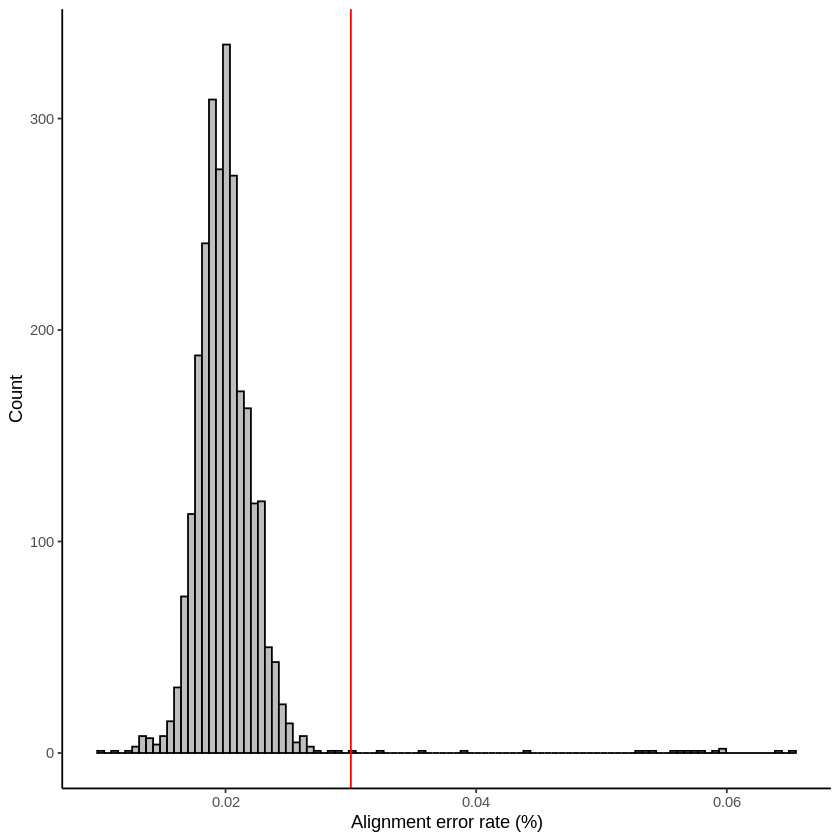

In [68]:
# Histogram of alignment error rates aross all samples
allData %>%
    ggplot(., aes(x = general_error_rate)) +
    geom_histogram(bins = 100, color = 'black', fill = 'grey') +
    ylab('Count') + xlab('Alignment error rate (%)') +
    geom_vline(xintercept = 0.03, color = 'red') +
    theme_classic()

In [72]:
allData %>% filter(general_error_rate >= 0.03)

Sample,city,pop,individual,bam_file,total_reads,mapped_reads,mapped_bases,sequenced_bases,mean_insert_size,median_insert_size,mean_mapping_quality,general_error_rate,mean_coverage,percentage_aligned
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Calgary_25_13,Calgary,25,13,/home/santang3/scratch/glue/results/bam/final/Calgary_25_13_merged_sorted_dupsMarked.bam,8497089,4310616,376981507,375727360,97275.66,155,5.2199,0.0555,0.4098,50.730503
Edmonton_3_10,Edmonton,3,10,/home/santang3/scratch/glue/results/bam/final/Edmonton_3_10_merged_sorted_dupsMarked.bam,9835841,6259299,383560460,382288895,74878.51,27,5.5077,0.0528,0.4170,63.637659
Kyoto_23_11,Kyoto,23,11,/home/santang3/scratch/glue/results/bam/final/Kyoto_23_11_merged_sorted_dupsMarked.bam,9195443,172322,11959889,11938176,98650.41,23,3.5878,0.0301,0.0130,1.873993
Linkoping_25_1,Linkoping,25,1,/home/santang3/scratch/glue/results/bam/final/Linkoping_25_1_merged_sorted_dupsMarked.bam,12545950,4422859,310329826,309018184,71476.11,61,5.2858,0.0595,0.3374,35.253281
Linkoping_25_3,Linkoping,25,3,/home/santang3/scratch/glue/results/bam/final/Linkoping_25_3_merged_sorted_dupsMarked.bam,18466451,5099015,290245554,289185027,50527.47,22,5.2178,0.0540,0.3155,27.612317
Linkoping_25_4,Linkoping,25,4,/home/santang3/scratch/glue/results/bam/final/Linkoping_25_4_merged_sorted_dupsMarked.bam,10117368,4996023,304972904,303917053,57647.67,27,4.9359,0.0579,0.3316,49.380659
Linkoping_8_8,Linkoping,8,8,/home/santang3/scratch/glue/results/bam/final/Linkoping_8_8_merged_sorted_dupsMarked.bam,9075788,3867545,423100530,420647415,272708.94,143,6.8068,0.0537,0.4600,42.613876
Melbourne_2_3,Melbourne,2,3,/home/santang3/scratch/glue/results/bam/final/Melbourne_2_3_merged_sorted_dupsMarked.bam,14775607,10564639,810484999,805587335,143612.21,72,6.7493,0.0593,0.8811,71.500541
Melbourne_2_6,Melbourne,2,6,/home/santang3/scratch/glue/results/bam/final/Melbourne_2_6_merged_sorted_dupsMarked.bam,5168034,711893,65217764,65026102,141464.30,109,6.6915,0.0326,0.0709,13.774929


Removing samples with error rates > 3% would get rid of 18 samples

- This includes the 3 samples we've prviously removed from the Toronto analyses an the 5 previously removed from GLUE_LOW1
- These samples also tend to have really small insert sizes, suggesting the libraries were too fragmented and likely contained a lot of adapters

### Histrogram of coverage across all samples

- These histograms exclude the 18 samples with high alignment error rates

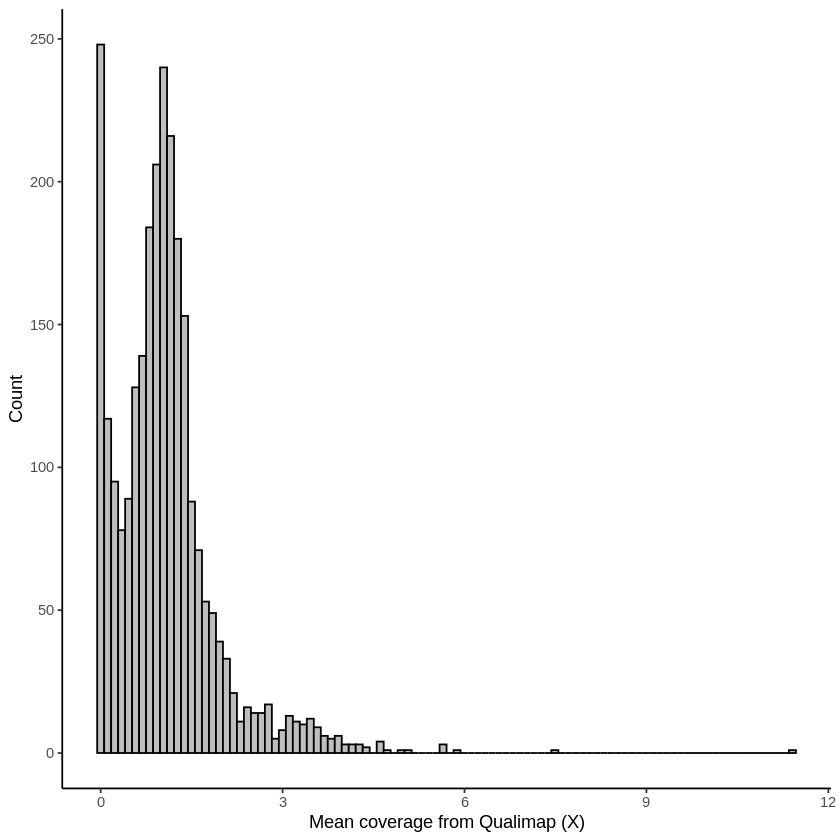

In [74]:
# Histogram of coverage across all samples
allData %>%
    filter(general_error_rate < 0.03) %>%
    ggplot(., aes(x = mean_coverage)) +
    geom_histogram(bins = 100, color = 'black', fill = 'grey') +
    ylab('Count') + xlab('Mean coverage from Qualimap (X)') +
    theme_classic()

In [75]:
# Let's see which of those samples have coverage above 5X
allData %>%
    filter(general_error_rate < 0.03) %>%
    filter(mean_coverage >= 5)

Sample,city,pop,individual,bam_file,total_reads,mapped_reads,mapped_bases,sequenced_bases,mean_insert_size,median_insert_size,mean_mapping_quality,general_error_rate,mean_coverage,percentage_aligned
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Antwerp_36_12,Antwerp,36,12,/home/santang3/scratch/glue/results/bam/final/Antwerp_36_12_merged_sorted_dupsMarked.bam,43700306,42162816,5380879157,5369529890,63339.30,135,13.5003,0.0220,5.8499,96.48174
Antwerp_5_10,Antwerp,5,10,/home/santang3/scratch/glue/results/bam/final/Antwerp_5_10_merged_sorted_dupsMarked.bam,40981520,36212914,4611138885,4602366065,58725.15,137,13.0159,0.0213,5.0130,88.36401
Antwerp_5_6,Antwerp,5,6,/home/santang3/scratch/glue/results/bam/final/Antwerp_5_6_merged_sorted_dupsMarked.bam,43485703,41379573,5211504079,5201323371,87868.79,131,12.9530,0.0223,5.6657,95.15673
Armidale_37_8,Armidale,37,8,/home/santang3/scratch/glue/results/bam/final/Armidale_37_8_merged_sorted_dupsMarked.bam,39803025,39121478,5192111104,5181293993,91430.61,157,14.1973,0.0209,5.6446,98.28770
Paris_13_3,Paris,13,3,/home/santang3/scratch/glue/results/bam/final/Paris_13_3_merged_sorted_dupsMarked.bam,51224197,50528909,6927675986,6912693582,136256.51,178,14.3159,0.0188,7.5315,98.64266
Paris_15_13,Paris,15,13,/home/santang3/scratch/glue/results/bam/final/Paris_15_13_merged_sorted_dupsMarked.bam,37294835,36934168,5164447714,5152260281,169910.95,215,14.7216,0.0194,5.6146,99.03293
Punt_Ar_3_4,Punt_Ar,3,4,/home/santang3/scratch/glue/results/bam/final/Punt_Ar_3_4_merged_sorted_dupsMarked.bam,76361035,75547138,10495399524,10472766449,133367.96,191,14.2800,0.0190,11.4101,98.93415


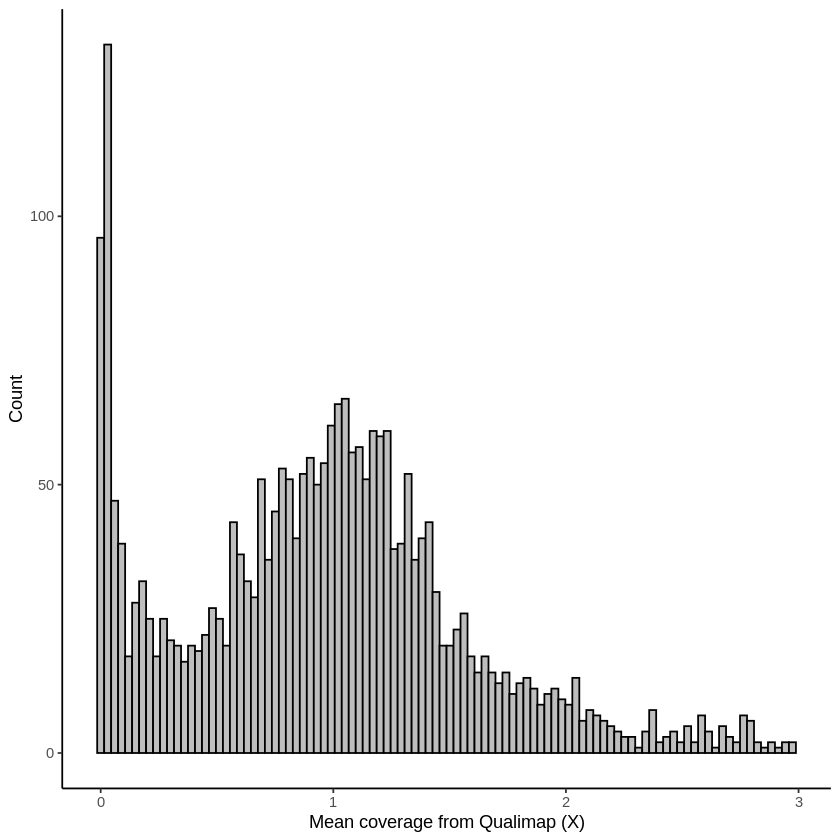

In [76]:
# Let look more closely at the distribution on coverage from 0 to 3X
allData %>%
    filter(general_error_rate < 0.03) %>%
    filter(mean_coverage <= 3) %>%
    ggplot(., aes(x = mean_coverage)) +
    geom_histogram(bins = 100, color = 'black', fill = 'grey') +
    ylab('Count') + xlab('Mean coverage from Qualimap (X)') +
    theme_classic()

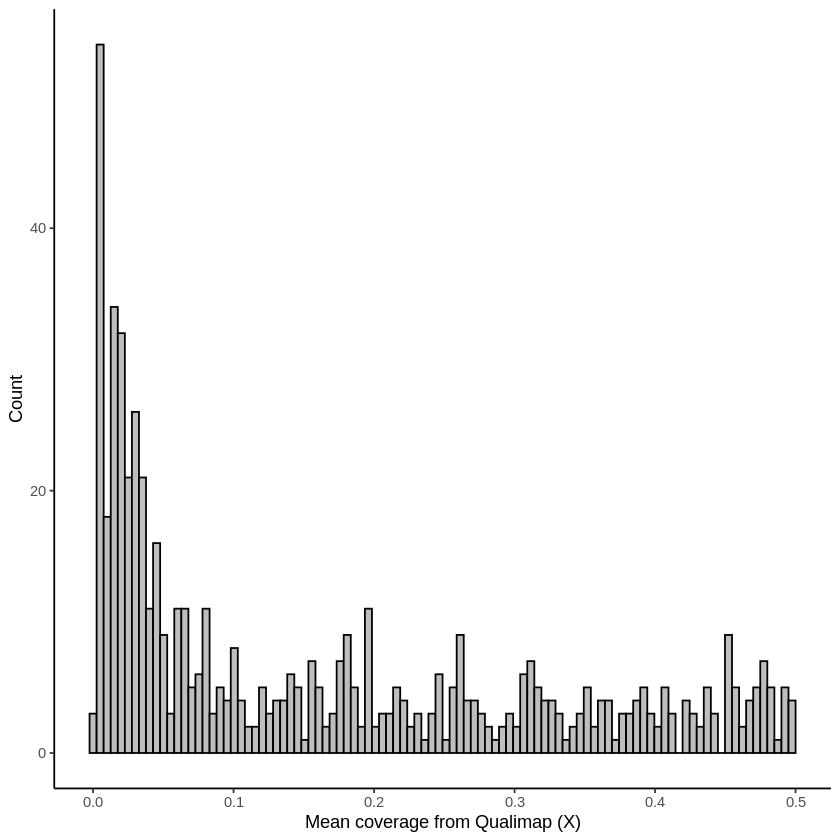

In [77]:
# Now between 0 and 0.5X
allData %>%
    filter(general_error_rate < 0.03) %>%
    filter(mean_coverage <= 0.5) %>%
    ggplot(., aes(x = mean_coverage)) +
    geom_histogram(bins = 100, color = 'black', fill = 'grey') +
    ylab('Count') + xlab('Mean coverage from Qualimap (X)') +
    theme_classic()

In [93]:
# What's the mean coverage across all samples?
allData %>%
    filter(general_error_rate < 0.03) %>%
    summarize(mean = mean(mean_coverage))

mean
<dbl>
1.057962


### Coverage by city

- Most of out analyses are based on city-by-city analyses so let's see how the QC breaks down by city

In [141]:
# Summary stats of coverage by city for all GLUE samples
# Show number of samples by habitat, mean coverage across samples, and proportion of samples in a city with mean coverage over 0.5X and over 1X
# site == 's' is for suburban sites and only applies to Toronto
allSamples_summary <- allData %>%
    filter(general_error_rate < 0.03) %>%
    group_by(city, site) %>%
    summarise(n = n()) %>%
    pivot_wider(names_from = site, values_from = n) %>%
    left_join(., allData %>% group_by(city) %>% summarise(mean_cov = mean(mean_coverage)), by = 'city') %>%
    left_join(., allData %>% mutate(over05 = ifelse(mean_coverage >= 0.5, 1, 0)) %>% group_by(city) %>% summarise(prop_over05 = sum(over05) / n()), by = 'city') %>%
    left_join(., allData %>% mutate(over1 = ifelse(mean_coverage >= 1, 1, 0)) %>% group_by(city) %>% summarise(prop_over1 = sum(over1) / n()), by = 'city') %>%
    mutate_if(is.numeric, round, 2) %>%
    arrange(mean_cov)
allSamples_summary

`summarise()` has grouped output by 'city'. You can override using the `.groups` argument.
`mutate_if()` ignored the following grouping variables:
Column `city`


city,r,u,s,mean_cov,prop_over05,prop_over1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hiroshima,38,41,NA,0.24,0.22,0.03
Sydney,3,3,NA,0.30,0.17,0.17
Kyoto,25,22,NA,0.31,0.17,0.10
Melbourne,34,38,NA,0.40,0.31,0.09
Canberra,24,35,NA,0.56,0.47,0.08
Bogota,29,33,NA,0.58,0.50,0.15
Linkoping,47,46,NA,0.65,0.54,0.24
Medellin,27,24,NA,0.67,0.43,0.33
Tokyo,3,3,NA,0.68,0.67,0.33


In [142]:
# Same as above but only for samples in GLUE_PC (i.e., phenotypic clines) paper
glue_pc_summary <- allData %>%
    filter(general_error_rate < 0.03) %>%
    filter(!library == 'low2') %>% # Get rid of LOW2 samples
    filter(!site == 's') %>% # Get rid of suburban samples for Toronto
    group_by(city, site) %>%
    summarise(n = n()) %>%
    pivot_wider(names_from = site, values_from = n) %>%
    left_join(., allData %>% group_by(city) %>% summarise(mean_cov = mean(mean_coverage)), by = 'city') %>%
    left_join(., allData %>% mutate(over05 = ifelse(mean_coverage >= 0.5, 1, 0)) %>% group_by(city) %>% summarise(prop_over05 = sum(over05) / n()), by = 'city') %>%
    left_join(., allData %>% mutate(over1 = ifelse(mean_coverage >= 1, 1, 0)) %>% group_by(city) %>% summarise(prop_over1 = sum(over1) / n()), by = 'city') %>%
    mutate_if(is.numeric, round, 2) %>%
    arrange(mean_cov)
glue_pc_summary

`summarise()` has grouped output by 'city'. You can override using the `.groups` argument.
`mutate_if()` ignored the following grouping variables:
Column `city`


city,r,u,mean_cov,prop_over05,prop_over1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hiroshima,38,41,0.24,0.22,0.03
Kyoto,25,22,0.31,0.17,0.10
Melbourne,34,38,0.40,0.31,0.09
Canberra,24,35,0.56,0.47,0.08
Bogota,29,33,0.58,0.50,0.15
Linkoping,47,46,0.65,0.54,0.24
Medellin,27,24,0.67,0.43,0.33
Paris,44,48,0.77,0.35,0.32
Albuquerque,47,46,0.91,0.82,0.30


In [143]:
nrow(allData )

[1] 2626